In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [42]:
df.shape

(4898, 12)

In [43]:
X = df.iloc[:, :-1].values

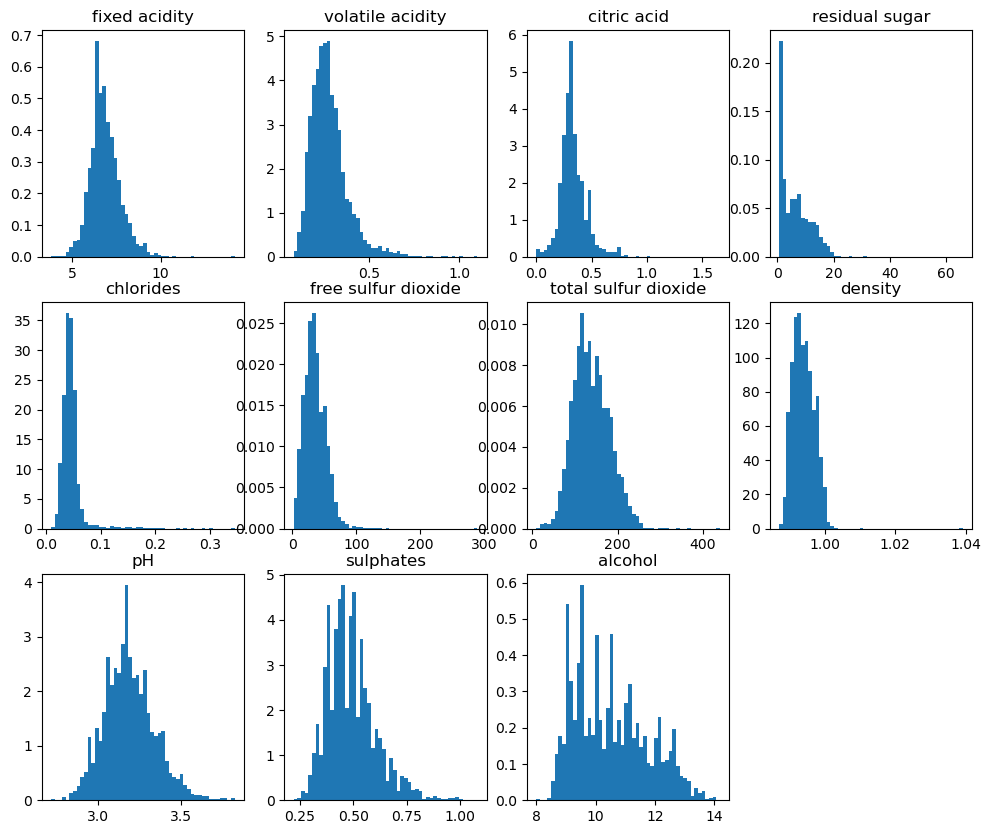

In [44]:
figure = plt.figure(figsize=(12,10))

for feature_idx in range(X.shape[1]):
    ax = plt.subplot(3,4,feature_idx +1)
    ax.hist(X[:, feature_idx], bins=50, density=True, edgecolor=None)
    ax.set_title(df.columns[feature_idx])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std= scaler.fit_transform(X)

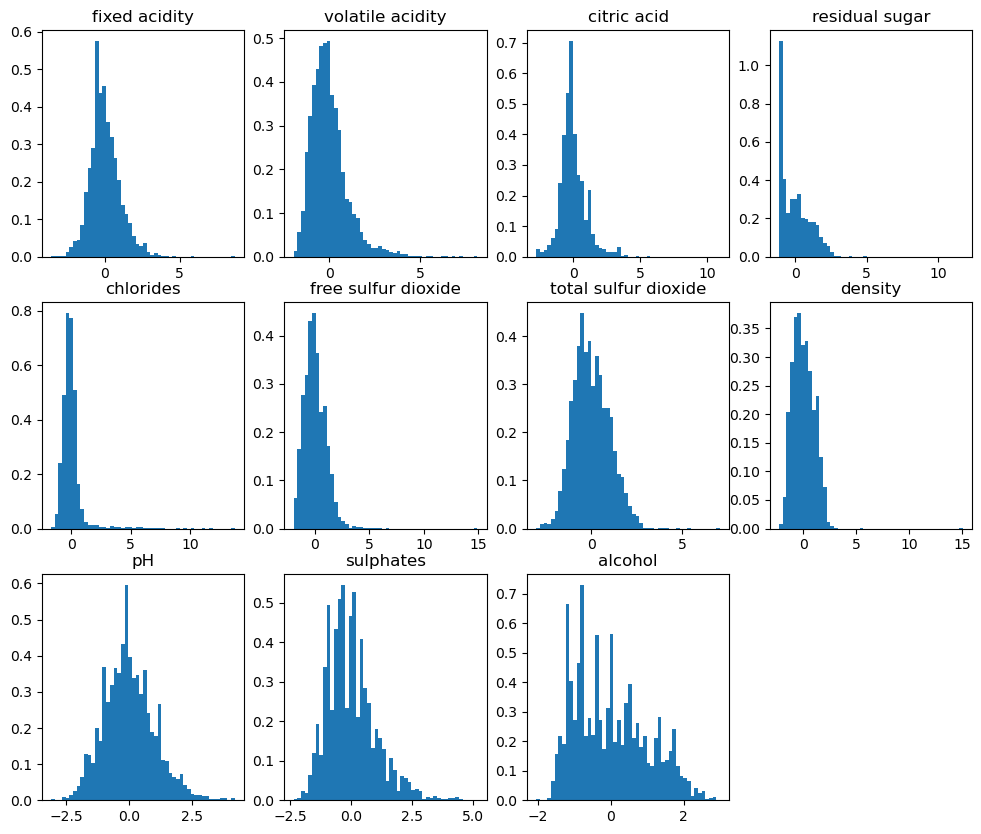

In [46]:
figure = plt.figure(figsize=(12,10))

for feature_idx in range(X_std.shape[1]):
    ax = plt.subplot(3,4,feature_idx +1)
    ax.hist(X_std[:, feature_idx], bins=50, density=True, edgecolor=None)
    ax.set_title(df.columns[feature_idx])

In [47]:
y = df['quality'].values

In [48]:
y_class = np.where(y<6, 0, 1)

In [49]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test  = train_test_split(X_std,y_class, test_size=0.3, random_state=0)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(2,10)}, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [82]:
for score, std, param in zip(clf.cv_results_['mean_test_score'],
                             clf.cv_results_['std_test_score'],
                             clf.cv_results_['params']):
    print(f"Param: {param} => score={score*100:0.1f}% (+/- {std*2:0.3f})")

Param: {'n_neighbors': 2} => score=73.1% (+/- 0.008)
Param: {'n_neighbors': 3} => score=75.7% (+/- 0.032)
Param: {'n_neighbors': 4} => score=75.1% (+/- 0.018)
Param: {'n_neighbors': 5} => score=76.5% (+/- 0.022)
Param: {'n_neighbors': 6} => score=75.6% (+/- 0.029)
Param: {'n_neighbors': 7} => score=75.7% (+/- 0.030)
Param: {'n_neighbors': 8} => score=75.9% (+/- 0.026)
Param: {'n_neighbors': 9} => score=76.3% (+/- 0.020)


In [83]:
clf.best_params_

{'n_neighbors': 5}

In [84]:
score = clf.score(X_test, y_test)

In [85]:
score

0.7510204081632653